# Project - Titanic Survivors

# 1. Importing Necessary Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statistics
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import os

# 2. Taking Dataset into Dataframe

In [2]:
titanic=pd.read_csv(r"F:\Data Analytics Notes\IMS Project\train.csv")

# 3. Data Pre-Processing

## a) Understanding the Data

Step- 

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
titanic.describe (include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Elsbury, Mr. William James",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.shape

(891, 12)

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
titanic['Pclass'].unique().tolist()

[3, 1, 2]

In [11]:
titanic['Embarked'].unique().tolist()

['S', 'C', 'Q', nan]

## b) Data Visualization

Now, some exploratory data analysis!

## i) Uni-Variate Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

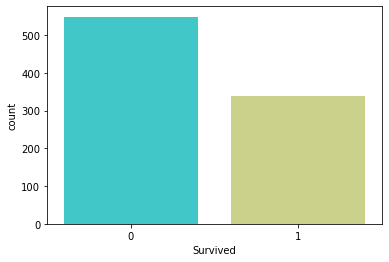

In [98]:
sns.countplot(x='Survived',data=titanic,palette='rainbow') 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

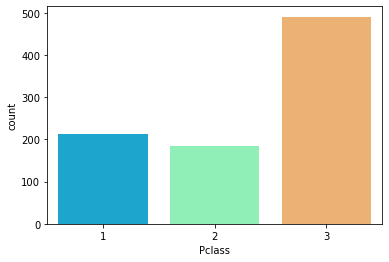

In [85]:
sns.countplot(x='Pclass',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='count'>

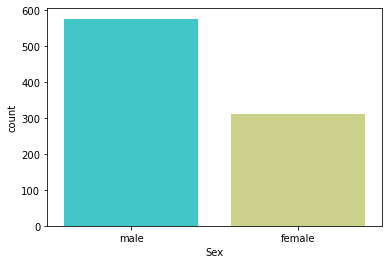

In [87]:
sns.countplot(x='Sex',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

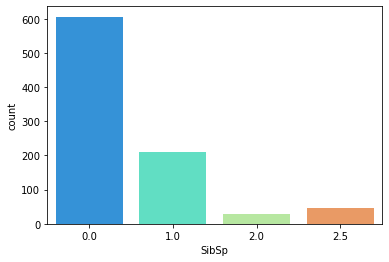

In [97]:
sns.countplot(x='SibSp',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='Parch', ylabel='count'>

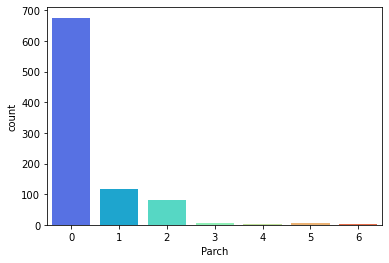

In [96]:
sns.countplot(x='Parch',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

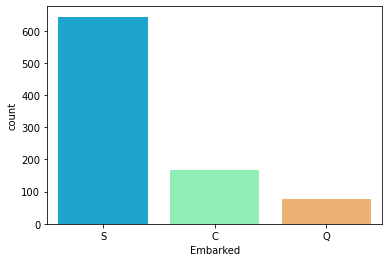

In [90]:
sns.countplot(x='Embarked',data=titanic,palette='rainbow')

## ii) Bi-Variate Analysis

<AxesSubplot:xlabel='Pclass', ylabel='count'>

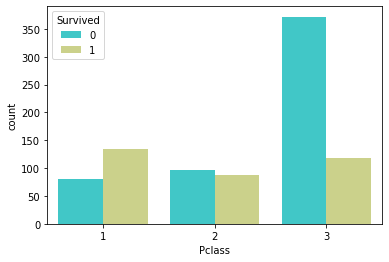

In [91]:
sns.countplot(x='Pclass', hue='Survived',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='count'>

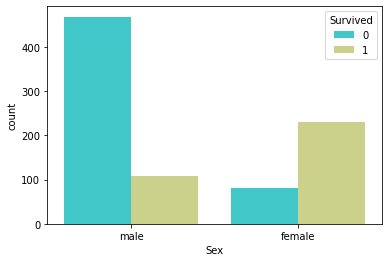

In [92]:
sns.countplot(x='Sex',hue='Survived',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

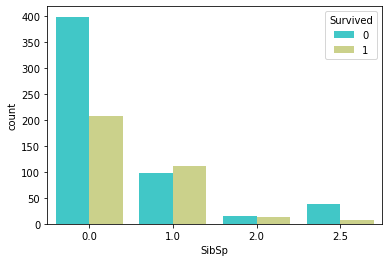

In [93]:
sns.countplot(x='SibSp',hue='Survived',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='Parch', ylabel='count'>

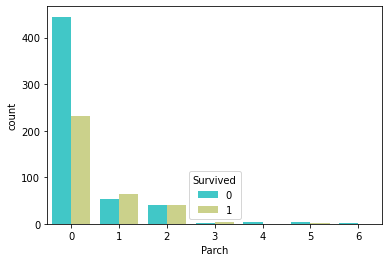

In [94]:
sns.countplot(x='Parch',hue='Survived',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

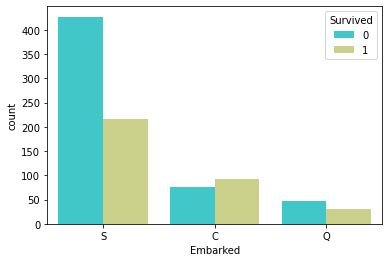

In [95]:
sns.countplot(x='Embarked',hue='Survived',data=titanic,palette='rainbow')

# 4. Correlation  between Variables

<AxesSubplot:>

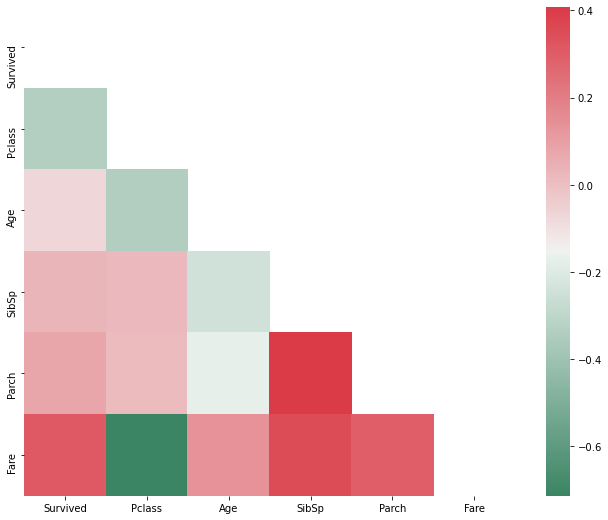

In [113]:
corr = titanic.corr()


mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(510, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap)


## c) Treatment of Outliers

<AxesSubplot:>

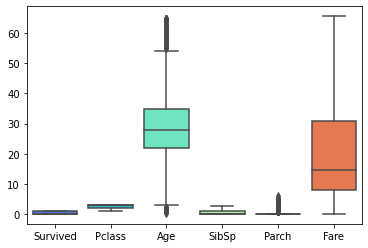

In [99]:
sns.boxplot(data=titanic,palette='rainbow')

<AxesSubplot:xlabel='Age'>

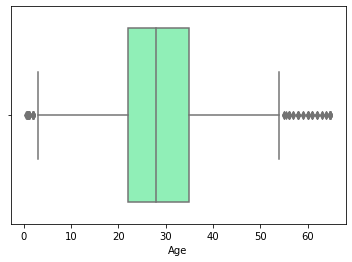

In [100]:
sns.boxplot(x='Age',data=titanic,palette='rainbow')

In [25]:
q1 = titanic['Age'].quantile(0.25)
q3 = titanic['Age'].quantile(0.75)
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr
lower_limit,upper_limit

(-6.6875, 64.8125)

In [26]:
titanic['Age']=np.where(titanic['Age']>upper_limit,upper_limit,titanic['Age'])
titanic['Age']=np.where(titanic['Age']<lower_limit,lower_limit,titanic['Age'])

<AxesSubplot:xlabel='Age'>

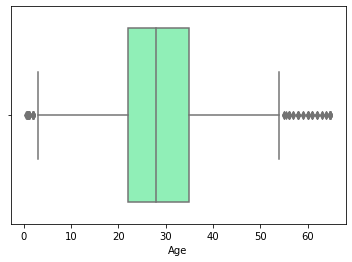

In [101]:
sns.boxplot(x='Age',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='SibSp'>

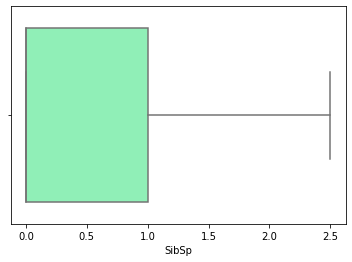

In [104]:
sns.boxplot(x='SibSp',data=titanic,palette='rainbow')

In [29]:
q1 = titanic['SibSp'].quantile(0.25)
q3 = titanic['SibSp'].quantile(0.75)
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr
lower_limit,upper_limit

(-1.5, 2.5)

In [30]:
titanic['SibSp']=np.where(titanic['SibSp']>upper_limit,upper_limit,titanic['SibSp'])

<AxesSubplot:xlabel='SibSp'>

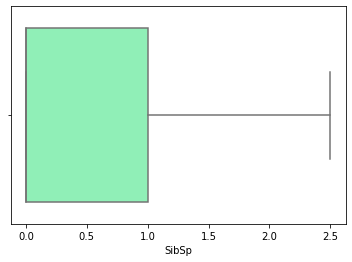

In [105]:
sns.boxplot(x='SibSp',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='Fare'>

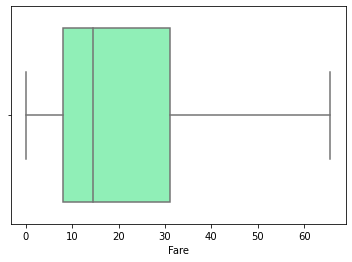

In [108]:
sns.boxplot(x='Fare',data=titanic,palette='rainbow')

In [33]:
q1 = titanic['Fare'].quantile(0.25)
q3 = titanic['Fare'].quantile(0.75)
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr
lower_limit,upper_limit

(-26.724, 65.6344)

In [34]:
titanic['Fare']=np.where(titanic['Fare']>upper_limit,upper_limit,titanic['Fare'])

<AxesSubplot:xlabel='Fare'>

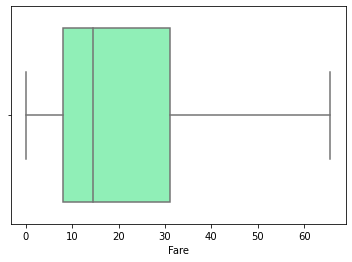

In [109]:
sns.boxplot(x='Fare',data=titanic,palette='rainbow')

<AxesSubplot:>

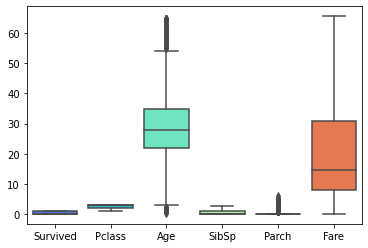

In [110]:
sns.boxplot(data=titanic,palette='rainbow')

## d) Treatment of Missing Values

In [37]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [39]:
titanic=titanic.drop(columns='Cabin',axis=1)

In [40]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [41]:
titanic=titanic.dropna(subset=['Embarked'])

In [42]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [43]:
titanic["Age"].fillna(titanic["Age"].median(skipna=True),inplace=True)

In [44]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [45]:
titanic=titanic.drop(['Name','Ticket','PassengerId'],axis=1)

In [46]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    float64
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 62.5+ KB


## e) Variable Transformation

In [47]:
titanic_num=titanic[['Pclass','Age','SibSp','Parch','Fare','Survived']]
titanic_cat=titanic[['Sex','Embarked']]

## f) Variable Creation

In [48]:
titanic_dummies=titanic_cat
titanic_dummies=titanic_dummies.apply(LabelEncoder().fit_transform)

In [49]:
titanic_dummies.head()

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


In [50]:
final_titanic=pd.concat([titanic_num,titanic_dummies],axis=1)

In [51]:
final_titanic.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex,Embarked
0,3,22.0,1.0,0,7.2500,0,1,2
1,1,38.0,1.0,0,65.6344,1,0,0
2,3,26.0,0.0,0,7.9250,1,0,2
3,1,35.0,1.0,0,53.1000,1,0,2
4,3,35.0,0.0,0,8.0500,0,1,2


In [52]:
final_titanic.corr()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex,Embarked
Pclass,1.000000,-0.337820,0.021124,0.016824,-0.713424,-0.335549,0.127741,0.164681
Age,-0.337820,1.000000,-0.242866,-0.172345,0.139266,-0.069832,0.084263,-0.020616
SibSp,0.021124,-0.242866,1.000000,0.408994,0.354161,0.033225,-0.170144,0.039187
Parch,0.016824,-0.172345,0.408994,1.000000,0.296234,0.083151,-0.247508,0.040449
Fare,-0.713424,0.139266,0.354161,0.296234,1.000000,0.313663,-0.230319,-0.203531
Survived,-0.335549,-0.069832,0.033225,0.083151,0.313663,1.000000,-0.541585,-0.169718
Sex,0.127741,0.084263,-0.170144,-0.247508,-0.230319,-0.541585,1.000000,0.110320
Embarked,0.164681,-0.020616,0.039187,0.040449,-0.203531,-0.169718,0.110320,1.000000


# 5. Splitting Data into Training & Testing Data

In [53]:
X = final_titanic.drop('Survived', axis=1)
Y = final_titanic[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# 6. Performing Logistic Regression

In [54]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived
115,3,21.0,0.0,0,7.9250,1,2,0
874,2,28.0,1.0,0,24.0000,0,0,1
77,3,28.0,0.0,0,8.0500,1,2,0
876,3,20.0,0.0,0,9.8458,1,2,0
682,3,20.0,0.0,0,9.2250,1,2,0


## i) Hypothesis

* H0 : There is no Log linear relationship between the survived and all independent variables.
    
    Or
 
 
* H1 : There is a log linear relationship between the survived and all independent variables.

Alpha = 0.05

In [55]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model=smf.logit(formula="Survived~C(Sex)+Pclass+Age+SibSp+Parch+Fare+Embarked",data=final_titanic).fit()
print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.443404
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.333     
Dependent Variable: Survived         AIC:              804.3715  
Date:               2021-07-19 12:44 BIC:              842.6922  
No. Observations:   889              Log-Likelihood:   -394.19   
Df Model:           7                LL-Null:          -591.41   
Df Residuals:       881              LLR p-value:      3.7017e-81
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     4.8821    0.6621    7.3731  0.0000   3.5843   6.1799
C(Sex)[T.1]  -2.7329    0.1996  -13.6925  0.0000  -3.1241  -2.

In [56]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model=smf.logit(formula="Survived~C(Sex)+Pclass+Age+SibSp",data=final_titanic).fit()
print(model.summary2())

Optimization terminated successfully.
         Current function value: 0.447875
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.327     
Dependent Variable: Survived         AIC:              806.3217  
Date:               2021-07-19 12:44 BIC:              830.2722  
No. Observations:   889              Log-Likelihood:   -398.16   
Df Model:           4                LL-Null:          -591.41   
Df Residuals:       884              LLR p-value:      2.3004e-82
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     5.1677    0.4835   10.6880  0.0000   4.2201   6.1154
C(Sex)[T.1]  -2.7156    0.1940  -13.9949  0.0000  -3.0960  -2.

# Conclusion: 
### There is a log linear relationship between the survived and all other independent variables.

## ii) Odds Ratio

In [57]:
model_odds = pd.DataFrame(np.exp(model.params),columns=["Odds_Ratio"])
model_odds

,Odds_Ratio
Intercept,175.518994
C(Sex)[T.1],0.066162
Pclass,0.304235
Age,0.961359
SibSp,0.690819


## iii) Prediction On Train Dataset

In [58]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived
115,3,21.0,0.0,0,7.9250,1,2,0
874,2,28.0,1.0,0,24.0000,0,0,1
77,3,28.0,0.0,0,8.0500,1,2,0
876,3,20.0,0.0,0,9.8458,1,2,0
682,3,20.0,0.0,0,9.2250,1,2,0


In [59]:
train['Probability']=model.predict(train)
train.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived,Probability
115,3,21.0,0.0,0,7.9250,1,2,0,0.125065
874,2,28.0,1.0,0,24.0000,0,0,1,0.788274
77,3,28.0,0.0,0,8.0500,1,2,0,0.097866
876,3,20.0,0.0,0,9.8458,1,2,0,0.129441
682,3,20.0,0.0,0,9.2250,1,2,0,0.129441
133,2,29.0,1.0,0,26.0000,0,2,1,0.781622
868,3,28.0,0.0,0,9.5000,1,2,0,0.097866
278,3,7.0,2.5,1,29.1250,1,1,0,0.089618
58,2,5.0,1.0,2,27.7500,0,2,1,0.902113
247,2,24.0,0.0,2,14.5000,0,2,1,0.863192


In [60]:
train['Predicted']=np.where(train['Probability']>0.7,1,0)
train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived,Probability,Predicted
115,3,21.0,0.0,0,7.9250,1,2,0,0.125065,0
874,2,28.0,1.0,0,24.0000,0,0,1,0.788274,1
77,3,28.0,0.0,0,8.0500,1,2,0,0.097866,0
876,3,20.0,0.0,0,9.8458,1,2,0,0.129441,0
682,3,20.0,0.0,0,9.2250,1,2,0,0.129441,0


## iv) Model Performance Metrics on Train Data

In [61]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'],train['Survived'])
print(matrix)

[[372 127]
 [ 11 112]]


In [62]:
Accuracy_Train=((369+112)/(622)*100)
print(Accuracy_Train)

77.33118971061094


In [63]:
from sklearn.metrics import classification_report
print(classification_report(train['Survived'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84       383
           1       0.91      0.47      0.62       239

    accuracy                           0.78       622
   macro avg       0.83      0.72      0.73       622
weighted avg       0.81      0.78      0.76       622



## v) Prediction on Test Data

In [64]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived
387,2,36.0,0.0,0,13.0000,0,2,1
259,2,50.0,0.0,1,26.0000,0,2,1
771,3,48.0,0.0,0,7.8542,1,2,0
208,3,16.0,0.0,0,7.7500,0,1,1
683,3,14.0,2.5,2,46.9000,1,2,0


In [65]:
test['Probability']=model.predict(test)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived,Probability
387,2,36.0,0.0,0,13.0000,0,2,1,0.797246
259,2,50.0,0.0,1,26.0000,0,2,1,0.693698
771,3,48.0,0.0,0,7.8542,1,2,0,0.047007
208,3,16.0,0.0,0,7.7500,0,1,1,0.724594
683,3,14.0,2.5,2,46.9000,1,2,0,0.069515


In [66]:
test['Predicted']=np.where(test['Probability']>0.7,1,0)
test.head(10)

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked,Survived,Probability,Predicted
387,2,36.0,0.0,0,13.0000,0,2,1,0.797246,1
259,2,50.0,0.0,1,26.0000,0,2,1,0.693698,0
771,3,48.0,0.0,0,7.8542,1,2,0,0.047007,0
208,3,16.0,0.0,0,7.7500,0,1,1,0.724594,1
683,3,14.0,2.5,2,46.9000,1,2,0,0.069515,0
3,1,35.0,1.0,0,53.1000,0,2,1,0.902793,1
677,3,18.0,0.0,0,9.8417,0,2,1,0.708591,1
542,3,11.0,2.5,2,31.2750,0,2,0,0.559641,0
532,3,17.0,1.0,1,7.2292,1,0,0,0.103626,0
2,3,26.0,0.0,0,7.9250,0,2,1,0.639522,0


## vi) Model Performance Metrics on Test Data

In [67]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Survived'])
print(matrix)

[[162  46]
 [  4  55]]


In [68]:
Accuracy_Test=((161+42)/(267)*100)
print(Accuracy_Train)

77.33118971061094


In [69]:
from sklearn.metrics import classification_report
print(classification_report(test['Survived'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87       166
           1       0.93      0.54      0.69       101

    accuracy                           0.81       267
   macro avg       0.86      0.76      0.78       267
weighted avg       0.84      0.81      0.80       267



# Finish